In [1]:

import numpy as np
import pandas as pd
from pathlib import Path
import gc
import itertools
import importlib
from IPython.display import clear_output

# BOKEH
import bokeh.plotting as bk
import bokeh.models as bkmod
import bokeh.layouts as bklay
import bokeh.palettes as bkpalettes
import bokeh.util.hex as bkhex
import bokeh.transform as bktrfm
import bokeh.colors as bkcolors


# xsuite
import xtrack as xt
import xmask as xm
import xfields as xf
import xpart as xp

# BBStudies
import BBStudies.Tracking.XsuitePlus as xPlus
import BBStudies.Tracking.XMask.Utils as xutils
import BBStudies.Physics.Constants as cst
import BBStudies.Plotting.Bokeh.Tools as bktools
import BBStudies.Plotting.Bokeh.Presets as bkpresets
import BBStudies.Physics.Base as phys

bk.output_notebook()
def plot_phase_space(df,rfbucket = None):
    _FIGS   = {}
    _default_fig_width  = 1400
    _bot_tab_height     = 400
    padding             = 20 
    # Phase space plots:
    #=====================================
    adjustment = 0
    _FIGS['x-px'] = bkpresets.make_scatter_fig(df,xy=('x_sig','px_sig')     ,alpha=0.2,title=f'x norm. phase space ({len(df)} particles)'   ,width=int(_default_fig_width/3.5)+adjustment,height=_bot_tab_height,padding=padding)
    _FIGS['y-py'] = bkpresets.make_scatter_fig(df,xy=('y_sig','py_sig')     ,alpha=0.2,title='y norm. phase space'                          ,width=int(_default_fig_width/3.5),height=_bot_tab_height,padding=padding)
    _FIGS['zeta-pzeta'] = bkpresets.make_scatter_fig(df,xy=('zeta','pzeta') ,alpha=0.2,title='zeta phase space'                             ,width=int(_default_fig_width/3.5),height=_bot_tab_height,padding=padding)


    _FIGS['x-px'].min_border_left  = padding
    bktools.set_aspect(_FIGS['x-px']       , x_lim=(-11,11),y_lim=(-11,11), aspect=1, margin=padding-adjustment)
    bktools.set_aspect(_FIGS['y-py']       , x_lim=(-11,11),y_lim=(-11,11), aspect=1, margin=0)
    # bktools.set_aspect(_FIGS['zeta-pzeta'] , x_lim=(-1,1),y_lim=(-1,1), aspect=1, margin=0)
    _FIGS['zeta-pzeta'].x_range  = bkmod.Range1d(-0.5, 0.5)
    _FIGS['zeta-pzeta'].y_range  = bkmod.Range1d(-5e-4, 5e-4)

    _FIGS['x-px'].xaxis.axis_label = r'$$\tilde x /\sqrt{\varepsilon_{x}}$$'
    _FIGS['x-px'].yaxis.axis_label = r'$$\tilde p_x /\sqrt{\varepsilon_{x}}$$'

    _FIGS['y-py'].xaxis.axis_label = r'$$\tilde y /\sqrt{\varepsilon_{y}}$$'
    _FIGS['y-py'].yaxis.axis_label = r'$$\tilde p_y /\sqrt{\varepsilon_{y}}$$'

    _FIGS['zeta-pzeta'].xaxis.axis_label = r'$$\zeta$$'
    _FIGS['zeta-pzeta'].yaxis.axis_label = r'$$p_\zeta $$'

    if rfbucket is not None:
        color = 'lightseagreen'
        ls    = 'solid'
        label = f'RF Bucket'
        for zcut in list(np.linspace(0.001,rfbucket.zeta_max,10)) + [0.09,2*0.09,3*0.09]:
            zeta_vec,delta_vec = rfbucket.invariant(zcut,npoints = 1000)

            if zcut/0.09 in [1,2,3]:
                color = 'mediumvioletred'
                ls    = 'dotted'
                label = f'σ'
            
            line_top = _FIGS['zeta-pzeta'].line(x=zeta_vec,y=delta_vec, line_width=2, color=color, alpha=0.2, line_dash=ls, legend_label=label)
            line_bot = _FIGS['zeta-pzeta'].line(x=zeta_vec,y=-delta_vec, line_width=2, color=color, alpha=0.2, line_dash=ls, legend_label=label)
            line_top.level = 'underlay'
            line_bot.level = 'underlay'
            # plt.plot(zeta_vec,delta_vec,'-',color='C2')
            # plt.plot(zeta_vec,-delta_vec,'-',color='C2')
    


    grid = bklay.gridplot([[_FIGS['x-px'] ,_FIGS['y-py'] ,_FIGS['zeta-pzeta']]],toolbar_location='right')
    #=====================================
    return grid


Loading BokehJS ...

In [2]:
import importlib
importlib.reload(bkpresets)

<module 'BBStudies.Plotting.Bokeh.Presets' from '/storage-hpc/gpfs_data/HPC/home_recovery/phbelang/abp/BBStudies/BBStudies/Plotting/Bokeh/Presets.py'>

---
# Loading collider for RFBucket
---

In [2]:
collider_path   = 'colliders/collider_BUNCH_0000.json'
collider        = xt.Multiline.from_json(collider_path)
line            = collider['lhcb1']
line.build_tracker()
rfbucket        = xPlus.RFBucket(line)
clear_output()

---
# Generating particles
---

In [3]:
density     = 363/(2*np.pi*1)/100

for r in np.linspace(1,10,10):
    n_points = int(2*np.pi*r*density)
    _df      = phys.polar_grid( r_sig     = [r],
                                theta_sig = np.linspace(0,2*np.pi,n_points))

In [5]:
import matplotlib.pyplot as plt

In [39]:
np.linspace(0 + delta,1/2 - delta,n_points+1)

array([0.00392699, 0.00638772, 0.00884845, 0.01130918, 0.01376991,
       0.01623064, 0.01869137, 0.0211521 , 0.02361283, 0.02607356,
       0.02853429, 0.03099502, 0.03345575, 0.03591648, 0.03837721,
       0.04083794, 0.04329867, 0.0457594 , 0.04822013, 0.05068086,
       0.05314159, 0.05560232, 0.05806305, 0.06052378, 0.06298451,
       0.06544524, 0.06790597, 0.0703667 , 0.07282743, 0.07528816,
       0.07774889, 0.08020962, 0.08267035, 0.08513108, 0.08759181,
       0.09005254, 0.09251327, 0.094974  , 0.09743473, 0.09989546,
       0.10235619, 0.10481692, 0.10727765, 0.10973838, 0.11219911,
       0.11465984, 0.11712058, 0.11958131, 0.12204204, 0.12450277,
       0.1269635 , 0.12942423, 0.13188496, 0.13434569, 0.13680642,
       0.13926715, 0.14172788, 0.14418861, 0.14664934, 0.14911007,
       0.1515708 , 0.15403153, 0.15649226, 0.15895299, 0.16141372,
       0.16387445, 0.16633518, 0.16879591, 0.17125664, 0.17371737,
       0.1761781 , 0.17863883, 0.18109956, 0.18356029, 0.18602

Text(0, 0.5, 'y')

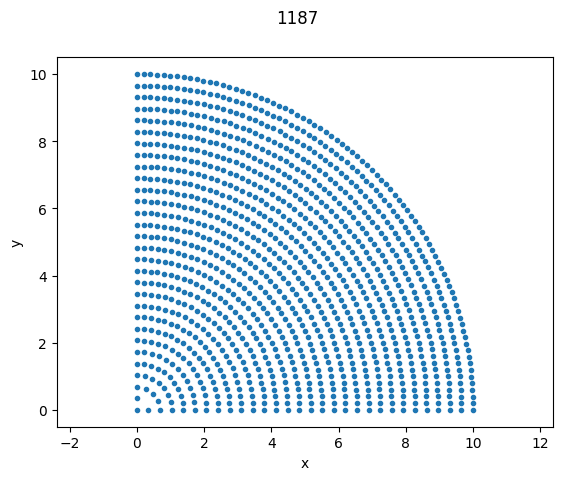

In [8]:
import matplotlib.pyplot as plt
density     = 8/(2*np.pi*1)
_generators = [pd.DataFrame({'x_sig':[0],'y_sig':[0]})]
delta = 0
for r in np.linspace(0,10,30)[1:]:
    n_points = int(2*np.pi*r*density)
    _df  = phys.polar_grid( r_sig     = [r],
                                theta_sig = np.linspace(0 + delta,np.pi/2 - delta,n_points))
    
    _generators.append(_df)#.rename(columns={'y_sig':'px_sig'})[['x_sig','px_sig']])


generator = pd.concat(_generators).reset_index()
n_part = len(generator)

plt.figure()
plt.suptitle(n_part)
plt.plot(generator.x_sig,generator.y_sig,'.')
plt.axis('equal');
plt.xlabel('x')
plt.ylabel('y')

In [16]:
np.linspace(0,10,20)

array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ])

In [4]:
_df

,r_sig,theta_sig,x_sig,y_sig
0,10.0,0.000000,10.000000,0.000000e+00
1,10.0,0.179520,9.839296,1.785569e+00
2,10.0,0.359039,9.362349,3.513748e+00
3,10.0,0.538559,8.584488,5.128993e+00
4,10.0,0.718078,7.530715,6.579387e+00
5,10.0,0.897598,6.234898,7.818315e+00
6,10.0,1.077117,4.738687,8.805955e+00
7,10.0,1.256637,3.090170,9.510565e+00
8,10.0,1.436157,1.342333,9.909498e+00
9,10.0,1.615676,-0.448648,9.989931e+00


In [22]:


density     = 11/(2*np.pi*1)
_generators = [pd.DataFrame({'x_sig':[0],'y_sig':[0]})]
delta = 0
for r in np.linspace(0,10,40)[1:]:
    n_points = int(2*np.pi*r*density)
    _df  = phys.polar_grid( r_sig     = [r],
                                theta_sig = np.linspace(0 + delta,np.pi/2 - delta,n_points))
    
    _generators.append(_df)#.rename(columns={'y_sig':'px_sig'})[['x_sig','px_sig']])


generator = pd.concat(_generators).reset_index()
n_part = len(generator)

#distribute longitudinal
# zeta_vec,delta_vec = rfbucket.invariant(0.09,npoints = 10000)
# zeta_vec,delta_vec = redistribute_along(zeta_vec,delta_vec,n_points = n_part)
# zeta_vec,delta_vec = redistribute_along(list(zeta_vec) + list(zeta_vec[::-1])[:-2],list(delta_vec) + list(-delta_vec[::-1])[:-2],n_points = n_part)


# Initializing:
#======================================================
coord_df = pd.DataFrame({   'x_sig' :np.zeros(n_part),
                            'px_sig':np.zeros(n_part),
                            'y_sig' :np.zeros(n_part),
                            'py_sig':np.zeros(n_part),
                            'zeta'  :np.zeros(n_part),
                            'delta' :np.zeros(n_part)})
#======================================================


# Overwriting
coord_df.loc[:,'x_sig']  = generator.x_sig.values
coord_df.loc[:,'y_sig']  = generator.x_sig.values
coord_df.loc[:,'zeta']   = 3*0.09


# Plotting
coord_df.insert(5,'pzeta',xPlus.delta2pzeta(coord_df['delta'],beta0=1))
coord_df.insert(0,'particle',coord_df.index)
particle_id = coord_df.index
bk.show(plot_phase_space(coord_df,rfbucket = rfbucket))
display(coord_df)

/tmp/ipykernel_39456/4236544738.py:84: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  grid = bklay.gridplot([[_FIGS['x-px'] ,_FIGS['y-py'] ,_FIGS['zeta-pzeta']]],toolbar_location='right')
/tmp/ipykernel_39456/4236544738.py:84: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  grid = bklay.gridplot([[_FIGS['x-px'] ,_FIGS['y-py'] ,_FIGS['zeta-pzeta']]],toolbar_location='right')


,particle,x_sig,px_sig,y_sig,py_sig,zeta,pzeta,delta
0,0,0.000000e+00,0.0,0.000000e+00,0.0,0.27,0.0,0.0
1,1,2.564103e-01,0.0,2.564103e-01,0.0,0.27,0.0,0.0
2,2,1.570060e-17,0.0,1.570060e-17,0.0,0.27,0.0,0.0
3,3,5.128205e-01,0.0,5.128205e-01,0.0,0.27,0.0,0.0
4,4,4.737844e-01,0.0,4.737844e-01,0.0,0.27,0.0,0.0
...,...,...,...,...,...,...,...,...
2177,2177,5.761198e-01,0.0,5.761198e-01,0.0,0.27,0.0,0.0
2178,2178,4.321946e-01,0.0,4.321946e-01,0.0,0.27,0.0,0.0
2179,2179,2.881796e-01,0.0,2.881796e-01,0.0,0.27,0.0,0.0
2180,2180,1.441048e-01,0.0,1.441048e-01,0.0,0.27,0.0,0.0


---
# Saving Results
---

In [23]:
coord_df.to_parquet('particles/XY_ZETA_3.parquet')

In [ ]:
coord_df.to_parquet('particles/XPLANE_ZETA_0.parquet')

---
# Load and plot
---

In [ ]:
coord_df = xPlus.import_parquet('particles/XPLANE_ZETA_1.parquet')
bk.show(plot_phase_space(coord_df,rfbucket = None))
display(coord_df)